**M14 - PARTE 2 - SCRIPTY(ABREVIATURA,GRAFICO E ANÁLISE)**

• Crie um script que receba uma lista de abreviaturas de meses (MAR, ABR, MAI,
JUN, etc) como argumento e gera as pastas e gráficos necessários para os meses
de referência.
Exemplo:
python “gerar analise.py” MAR ABR MAI JUN JUL
Deve gerar o seguinte resultado de diretórios e gráficos:
2019-03
2019-04
2019-05
2019-06
2019-07

In [33]:
#IMPORTANDO BIBLIOTECAS
#import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def main():
    """Main function to process command-line arguments."""
    if len(sys.argv) < 2:
        print("Usage: python your_script_name.py MAR ABR MAI JUN...")
        sys.exit(1)

    month_abbreviations = sys.argv[1:]
    print("Processing months:", month_abbreviations)

if __name__ == "__main__":
    main()

Processing months: ['MAR', 'ABR', 'MAI']


In [43]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de meses e seus números
MAPA_MESES = {
    "JAN": "01", "FEV": "02", "MAR": "03", "ABR": "04",
    "MAI": "05", "JUN": "06", "JUL": "07", "AGO": "08",
    "SET": "09", "OUT": "10", "NOV": "11", "DEZ": "12"
}

def gerar_graficos(df, mes_abrev, saida_dir):
    """Gera e salva gráficos básicos do SINASC para o mês selecionado usando subplots."""
    print(f" Gerando gráficos para {mes_abrev} usando subplots...")

    # Determina o número de gráficos a serem gerados com base nas colunas disponíveis
    num_graficos = 0
    if "SEXO" in df.columns:
        num_graficos += 1
    if "PARTO" in df.columns:
        num_graficos += 1
    if "IDADEMAE" in df.columns:
        num_graficos += 1
    if "PESO" in df.columns:
        num_graficos += 1
    # Adicione contagem para outros gráficos se necessário

    if num_graficos == 0:
        print(f" Nenhum gráfico para gerar para {mes_abrev}. Colunas necessárias ausentes.")
        return

    # Calcula o layout da grade de subplots (por exemplo, 2 colunas)
    n_cols = 2
    n_rows = (num_graficos + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
    axes = axes.flatten() # Transforma a matriz de eixos em um array 1D para fácil iteração

    plot_index = 0

    # Nascimentos por sexo
    if "SEXO" in df.columns:
        sns.countplot(data=df, x="SEXO", order=sorted(df["SEXO"].dropna().unique()), ax=axes[plot_index])
        axes[plot_index].set_title(f"Nascimentos por Sexo - {mes_abrev}/2019")
        axes[plot_index].set_xlabel("Sexo")
        axes[plot_index].set_ylabel("Contagem")
        plot_index += 1

    # Tipo de parto
    if "PARTO" in df.columns:
        # Ensure 'PARTO' column has appropriate data type if needed for plotting
        # If there are non-string values causing issues, handle them here
        try:
            sns.countplot(data=df, x="PARTO", order=sorted(df["PARTO"].dropna().unique()), ax=axes[plot_index])
            axes[plot_index].set_title(f"Tipo de Parto - {mes_abrev}/2019")
            axes[plot_index].set_xlabel("Tipo de Parto")
            axes[plot_index].set_ylabel("Contagem")
            plot_index += 1
        except Exception as e:
            print(f"  Erro ao gerar gráfico de Parto para {mes_abrev}: {e}")


    # Idade da mãe (histograma)
    if "IDADEMAE" in df.columns:
        # Ensure 'IDADEMAE' is numeric
        df['IDADEMAE'] = pd.to_numeric(df['IDADEMAE'], errors='coerce')
        sns.histplot(data=df.dropna(subset=['IDADEMAE']), x="IDADEMAE", bins=15, kde=True, ax=axes[plot_index])
        axes[plot_index].set_title(f"Distribuição da Idade das Mães - {mes_abrev}/2019")
        axes[plot_index].set_xlabel("Idade da Mãe")
        axes[plot_index].set_ylabel("Frequência")
        plot_index += 1

    # Peso ao nascer (histograma)
    if "PESO" in df.columns:
        # Ensure 'PESO' is numeric
        df['PESO'] = pd.to_numeric(df['PESO'], errors='coerce')
        sns.histplot(data=df.dropna(subset=['PESO']), x="PESO", bins=20, color="orange", kde=True, ax=axes[plot_index])
        axes[plot_index].set_title(f"Distribuição do Peso ao Nascer - {mes_abrev}/2019")
        axes[plot_index].set_xlabel("Peso (g)")
        axes[plot_index].set_ylabel("Frequência")
        plot_index += 1

    # Remove subplots não utilizados
    for i in range(plot_index, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(os.path.join(saida_dir, f"{mes_abrev}_analise_subplots.png"), bbox_inches="tight")
    plt.close(fig) # Fecha a figura inteira

    print(f"Gráfico de subplots gerado e salvo em: {saida_dir}\n")


# FUNÇÃO PRINCIPAL
def main():
    """Main function to process command-line arguments, create directories, load data, and generate plots."""
    # Verifica se foram passados meses como argumento
    if len(sys.argv) < 2:
        print(" Uso: python gerar_analise.py MAR ABR MAI JUN JUL")
        sys.exit(1)

    meses_abrev = [m.upper() for m in sys.argv[1:]]
    print(f"Meses selecionados: {', '.join(meses_abrev)}")

    dataframes = {} # Dictionary to store dataframes

    for mes in meses_abrev:
        if mes not in MAPA_MESES:
            print(f" Mês inválido ignorado: {mes}")
            continue

        num_mes = MAPA_MESES[mes]
        arquivo_csv = f"/content/SINASC_RO_2019_{mes}.csv"
        pasta_saida = f"2019-{num_mes}"

        # Create directory if it doesn't exist
        os.makedirs(pasta_saida, exist_ok=True)
        print(f" Diretório criado: {pasta_saida}")

        # Load data
        try:
            df = pd.read_csv(arquivo_csv)
            dataframes[mes] = df # Store dataframe in the dictionary
            print(f" Dados carregados de: {arquivo_csv}")

            # Generate graphics for the loaded dataframe
            gerar_graficos(df.copy(), mes, pasta_saida) # Pass a copy to avoid modifying the original dataframe in the dict

        except FileNotFoundError:
            print(f" Erro: Arquivo não encontrado: {arquivo_csv}. Pulando para o próximo mês.")
        except Exception as e:
            print(f" Erro ao processar o arquivo {arquivo_csv}: {e}")

    return dataframes # Return the dictionary of dataframes

if __name__ == "__main__":
    # This part is for notebook execution simulation. In a real script,
    # sys.argv would be populated from the command line.
    # For testing in notebook, uncomment and modify the line below:
    sys.argv = ['your_script_name.py', 'MAR', 'ABR', 'MAI'] # Example with MAR, ABR, MAI
    loaded_dataframes = main()

# Now, loaded_dataframes contains the dataframes and can be used for exploration.

Meses selecionados: MAR, ABR, MAI
 Diretório criado: 2019-03
 Dados carregados de: /content/SINASC_RO_2019_MAR.csv
 Gerando gráficos para MAR usando subplots...
Gráfico de subplots gerado e salvo em: 2019-03

 Diretório criado: 2019-04
 Dados carregados de: /content/SINASC_RO_2019_ABR.csv
 Gerando gráficos para ABR usando subplots...
Gráfico de subplots gerado e salvo em: 2019-04

 Diretório criado: 2019-05
 Dados carregados de: /content/SINASC_RO_2019_MAI.csv
 Gerando gráficos para MAI usando subplots...
Gráfico de subplots gerado e salvo em: 2019-05



In [35]:
def main():
    """Main function to process command-line arguments and create directories."""
    if len(sys.argv) < 2:
        print("Usage: python your_script_name.py MAR ABR MAI JUN...")
        sys.exit(1)

    month_abbreviations = sys.argv[1:]
    print("Processing months:", month_abbreviations)

    month_map = {
        'JAN': '01', 'FEV': '02', 'MAR': '03', 'ABR': '04',
        'MAI': '05', 'JUN': '06', 'JUL': '07', 'AGO': '08',
        'SET': '09', 'OUT': '10', 'NOV': '11', 'DEZ': '12'
    }

    year = "2019"

    for abbr in month_abbreviations:
        month_number = month_map.get(abbr.upper())
        if month_number:
            dir_name = f"{year}-{month_number}"
            os.makedirs(dir_name, exist_ok=True)
            print(f"Created directory: {dir_name}")
        else:
            print(f"Warning: Unknown month abbreviation '{abbr}'. Skipping.")

if __name__ == "__main__":
    main()

Processing months: ['MAR', 'ABR', 'MAI']
Created directory: 2019-03
Created directory: 2019-04
Created directory: 2019-05


In [37]:
# Dicionário de meses e seus números
MAPA_MESES = {
    "JAN": "01", "FEV": "02", "MAR": "03", "ABR": "04",
    "MAI": "05", "JUN": "06", "JUL": "07", "AGO": "08",
    "SET": "09", "OUT": "10", "NOV": "11", "DEZ": "12"
}

In [38]:
df_mar = loaded_dataframes['MAR']

print("\n--- Exploração de Dados para MAR ---")
print("\nTipos de Dados e Valores Ausentes:")
df_mar.info()

print("\nValores Ausentes por Coluna:")
print(df_mar.isnull().sum())

print("\nEstatísticas Descritivas (Colunas Numéricas):")
display(df_mar.describe())

print("\nEstatísticas Descritivas (Colunas Categóricas):")
display(df_mar.describe(include='object'))


--- Exploração de Dados para MAR ---

Tipos de Dados e Valores Ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   6844 non-null   int64  
 1   SEXO       6844 non-null   object 
 2   APGAR1     6820 non-null   float64
 3   APGAR5     6816 non-null   float64
 4   PESO       6844 non-null   int64  
 5   CONSULTAS  6844 non-null   int64  
 6   DTNASC     6844 non-null   object 
 7   GESTACAO   6521 non-null   object 
 8   GRAVIDEZ   6829 non-null   object 
 9   ESCMAE     6771 non-null   object 
 10  IDADEPAI   2046 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 588.3+ KB

Valores Ausentes por Coluna:
IDADEMAE        0
SEXO            0
APGAR1         24
APGAR5         28
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      323
GRAVIDEZ       15
ESCMAE         73
IDADEPAI     4798
dtype: 

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,6844.000000,6820.000000,6816.000000,6844.000000,6844.000000,2046.000000
mean,26.046172,8.150440,9.195716,3241.791788,3.561952,30.969208
std,6.343306,1.014461,0.839148,547.025069,0.771092,7.664514
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2964.250000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,35.000000
max,47.000000,10.000000,10.000000,5060.000000,9.000000,67.000000



Estatísticas Descritivas (Colunas Categóricas):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,6844,6844,6521,6829,6771
unique,2,90,6,2,5
top,Masculino,2019-03-21,37 a 41 semanas,Única,8 a 11 anos
freq,3467,109,5664,6710,3961


Para exibir os gráficos gerados, vamos listar os arquivos nas pastas de saída e exibir as imagens PNG.

Exibindo gráficos para MAR (2019-03):
  Exibindo: MAR_peso.png


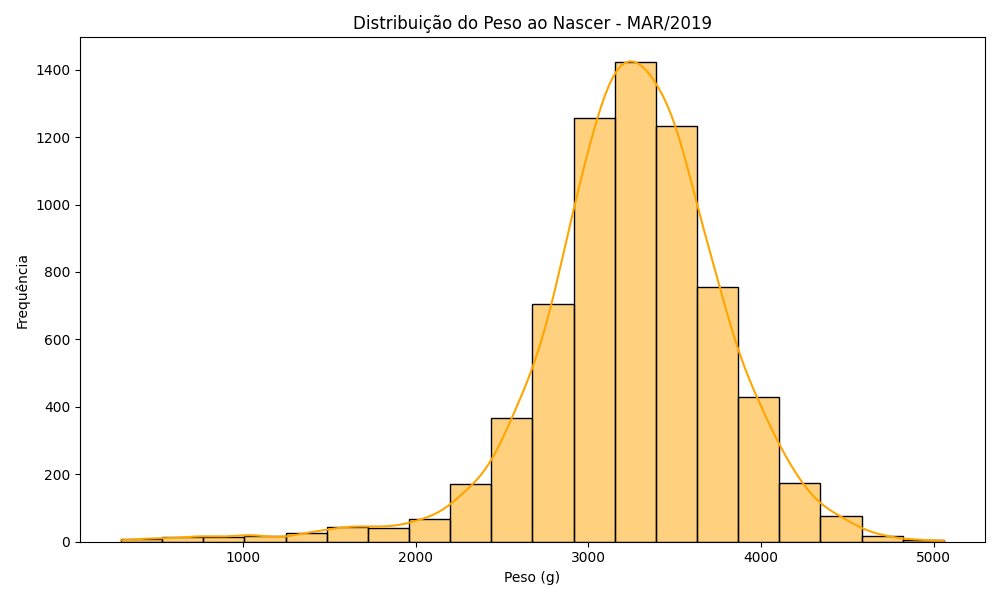

  Exibindo: MAR_sexo.png


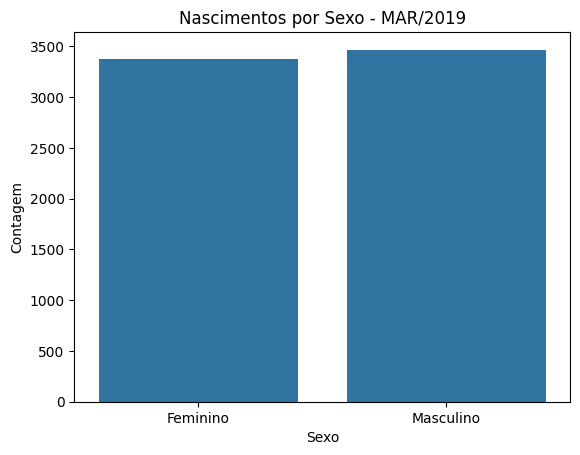

  Exibindo: MAR_idade_mae.png


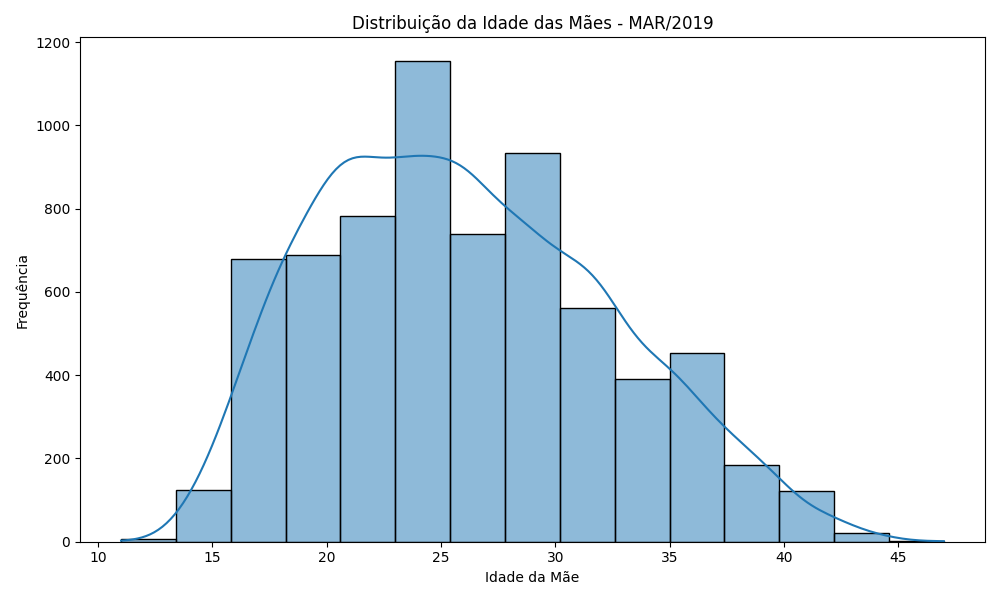

  Exibindo: APGAR5_countplot_MAR.png


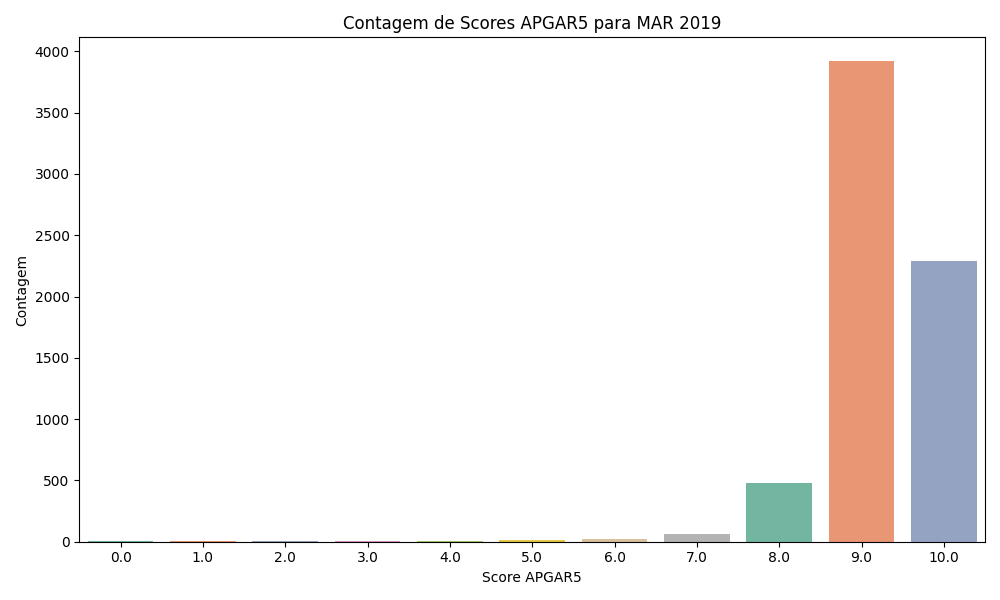

Exibindo gráficos para ABR (2019-04):
  Exibindo: ABR_peso.png


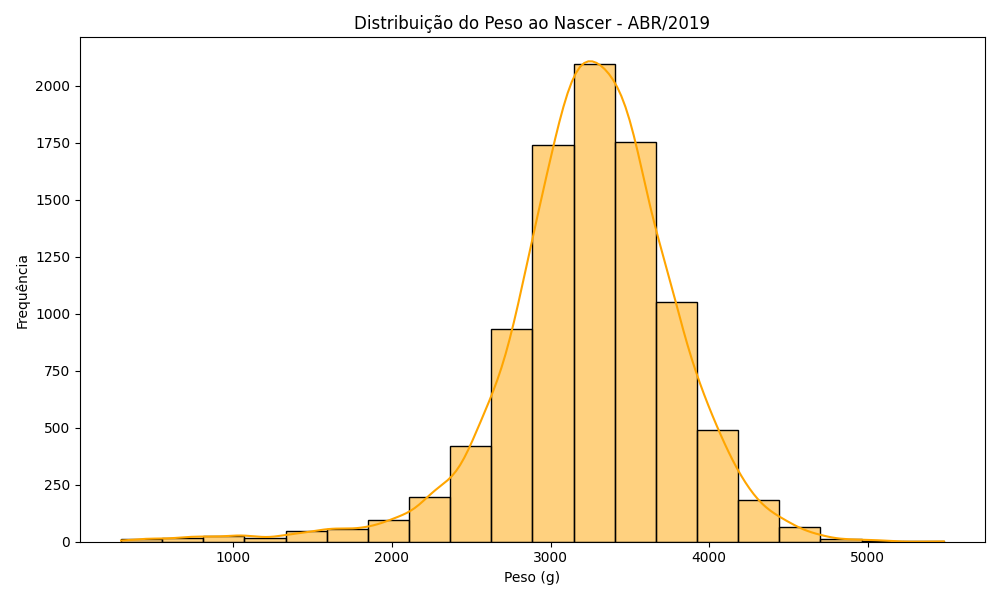

  Exibindo: ABR_sexo.png


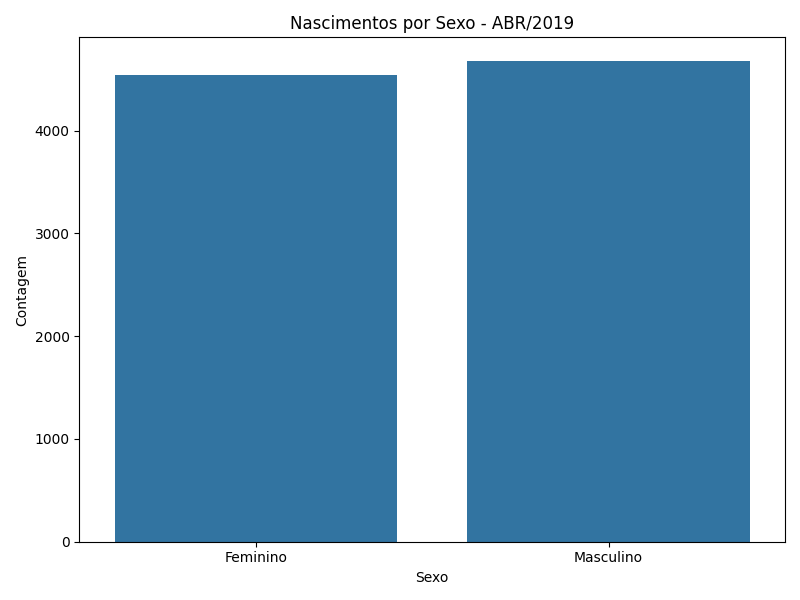

  Exibindo: ABR_idade_mae.png


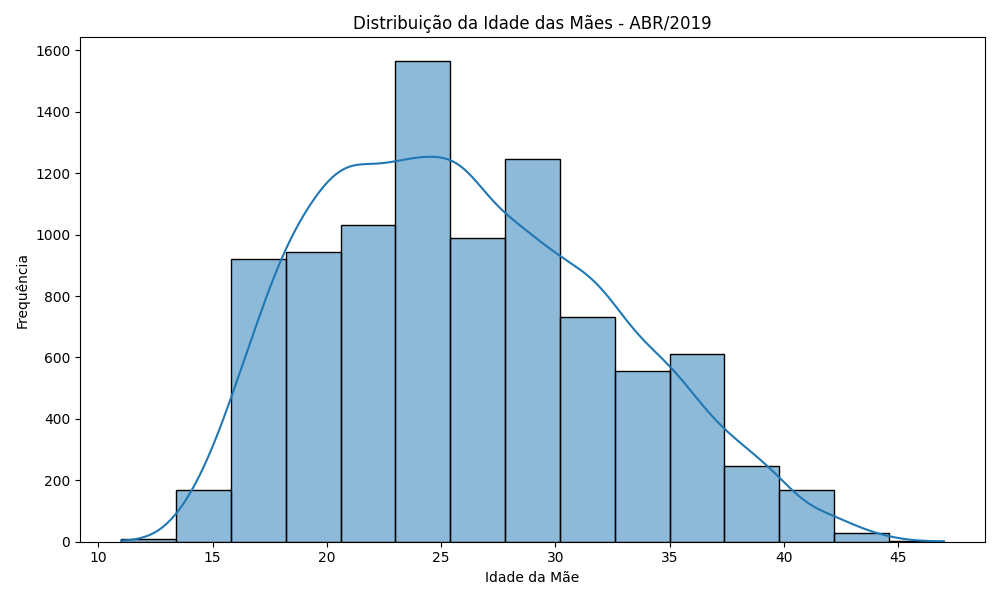

Exibindo gráficos para MAI (2019-05):
  Exibindo: MAI_sexo.png


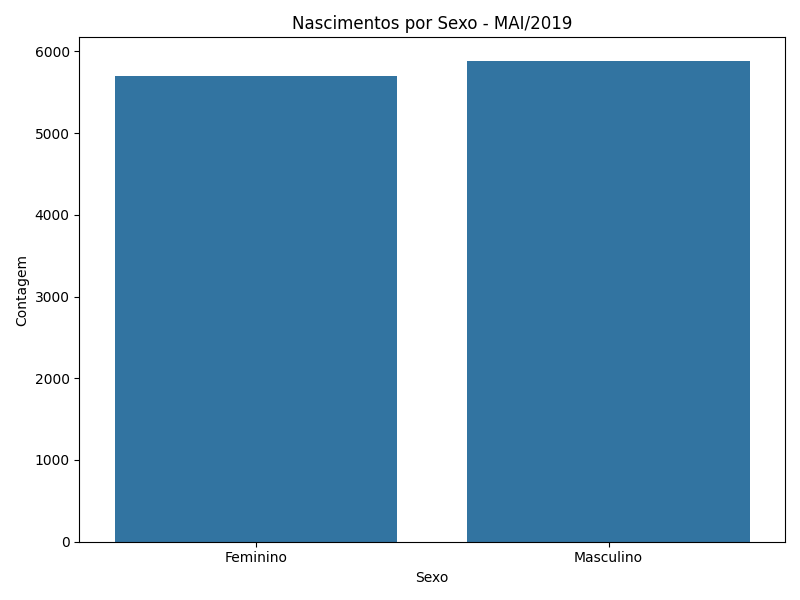

  Exibindo: MAI_peso.png


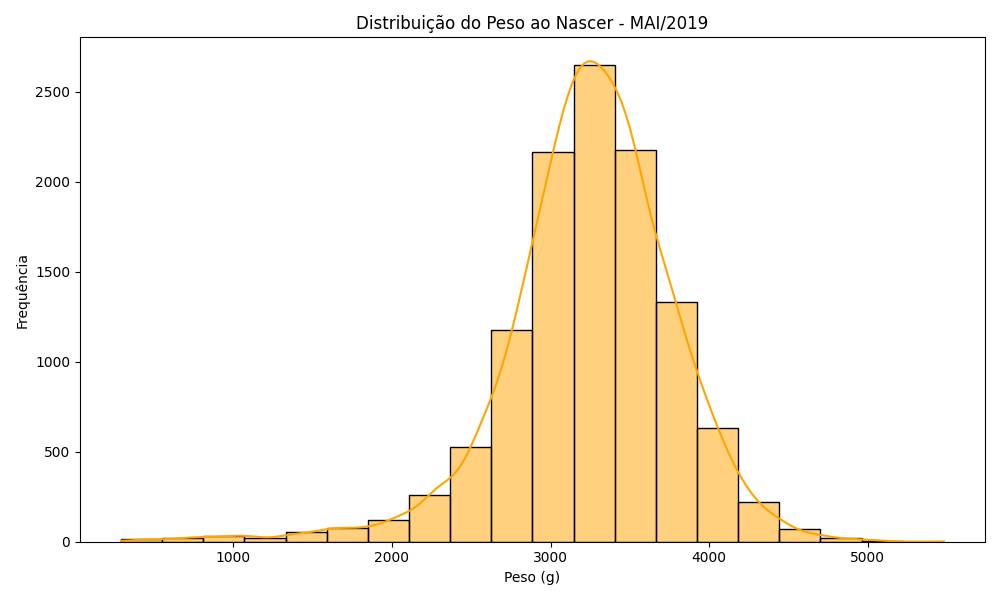

  Exibindo: MAI_idade_mae.png


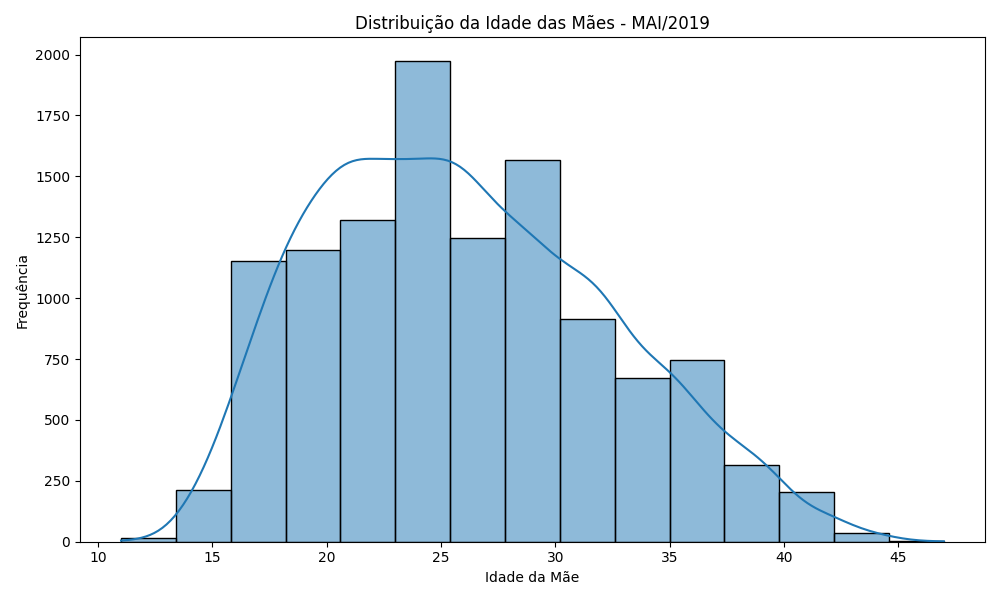

In [34]:
import os
from IPython.display import Image, display

meses_processados = loaded_dataframes.keys()
year = "2019"

for mes in meses_processados:
    num_mes = MAPA_MESES[mes]
    pasta_saida = f"{year}-{num_mes}"
    print(f"Exibindo gráficos para {mes} ({pasta_saida}):")

    if os.path.exists(pasta_saida):
        for arquivo in os.listdir(pasta_saida):
            if arquivo.endswith(".png"):
                caminho_arquivo = os.path.join(pasta_saida, arquivo)
                print(f"  Exibindo: {arquivo}")
                display(Image(filename=caminho_arquivo))
    else:
        print(f"  Diretório não encontrado: {pasta_saida}")

In [32]:
for month, df in loaded_dataframes.items():
    print(f"\n--- Exploração de Dados para {month} ---")
    print("\nTipos de Dados e Valores Ausentes:")
    df.info()

    print("\nValores Ausentes por Coluna:")
    print(df.isnull().sum())

    print("\nEstatísticas Descritivas (Colunas Numéricas):")
    display(df.describe())

    print("\nEstatísticas Descritivas (Colunas Categóricas):")
    display(df.describe(include='object'))


--- Exploração de Dados para MAR ---

Tipos de Dados e Valores Ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   6844 non-null   int64  
 1   SEXO       6844 non-null   object 
 2   APGAR1     6820 non-null   float64
 3   APGAR5     6816 non-null   float64
 4   PESO       6844 non-null   int64  
 5   CONSULTAS  6844 non-null   int64  
 6   DTNASC     6844 non-null   object 
 7   GESTACAO   6521 non-null   object 
 8   GRAVIDEZ   6829 non-null   object 
 9   ESCMAE     6771 non-null   object 
 10  IDADEPAI   2046 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 588.3+ KB

Valores Ausentes por Coluna:
IDADEMAE        0
SEXO            0
APGAR1         24
APGAR5         28
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      323
GRAVIDEZ       15
ESCMAE         73
IDADEPAI     4798
dtype: 

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,6844.000000,6820.000000,6816.000000,6844.000000,6844.000000,2046.000000
mean,26.046172,8.150440,9.195716,3241.791788,3.561952,30.969208
std,6.343306,1.014461,0.839148,547.025069,0.771092,7.664514
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2964.250000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,35.000000
max,47.000000,10.000000,10.000000,5060.000000,9.000000,67.000000



Estatísticas Descritivas (Colunas Categóricas):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,6844,6844,6521,6829,6771
unique,2,90,6,2,5
top,Masculino,2019-03-21,37 a 41 semanas,Única,8 a 11 anos
freq,3467,109,5664,6710,3961



--- Exploração de Dados para ABR ---

Tipos de Dados e Valores Ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9217 entries, 0 to 9216
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   9217 non-null   int64  
 1   SEXO       9215 non-null   object 
 2   APGAR1     9185 non-null   float64
 3   APGAR5     9181 non-null   float64
 4   PESO       9217 non-null   int64  
 5   CONSULTAS  9217 non-null   int64  
 6   DTNASC     9217 non-null   object 
 7   GESTACAO   8780 non-null   object 
 8   GRAVIDEZ   9192 non-null   object 
 9   ESCMAE     9120 non-null   object 
 10  IDADEPAI   2726 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 792.2+ KB

Valores Ausentes por Coluna:
IDADEMAE        0
SEXO            2
APGAR1         32
APGAR5         36
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      437
GRAVIDEZ       25
ESCMAE         97
IDADEPAI     6491
dtype: 

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,9217.000000,9185.000000,9181.000000,9217.000000,9217.000000,2726.000000
mean,26.051861,8.157866,9.195186,3246.202886,3.566779,30.939839
std,6.369323,0.986797,0.818111,542.139383,0.785416,7.866691
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2970.000000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3275.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,36.000000
max,47.000000,10.000000,10.000000,5480.000000,9.000000,73.000000



Estatísticas Descritivas (Colunas Categóricas):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,9215,9217,8780,9192,9120
unique,2,120,6,2,5
top,Masculino,2019-04-10,37 a 41 semanas,Única,8 a 11 anos
freq,4674,116,7622,9033,5391



--- Exploração de Dados para MAI ---

Tipos de Dados e Valores Ausentes:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   11582 non-null  int64  
 1   SEXO       11579 non-null  object 
 2   APGAR1     11544 non-null  float64
 3   APGAR5     11538 non-null  float64
 4   PESO       11582 non-null  int64  
 5   CONSULTAS  11582 non-null  int64  
 6   DTNASC     11582 non-null  object 
 7   GESTACAO   11050 non-null  object 
 8   GRAVIDEZ   11552 non-null  object 
 9   ESCMAE     11450 non-null  object 
 10  IDADEPAI   3369 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 995.5+ KB

Valores Ausentes por Coluna:
IDADEMAE        0
SEXO            3
APGAR1         38
APGAR5         44
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      532
GRAVIDEZ       30
ESCMAE        132
IDADEPAI     8213
dtype

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,11582.000000,11544.000000,11538.000000,11582.000000,11582.000000,3369.000000
mean,25.993956,8.157484,9.194488,3246.791659,3.569073,30.902939
std,6.359231,0.982992,0.813957,538.186153,0.780573,7.796576
min,11.000000,0.000000,0.000000,292.000000,1.000000,15.000000
25%,21.000000,8.000000,9.000000,2970.000000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3574.750000,4.000000,36.000000
max,47.000000,10.000000,10.000000,5480.000000,9.000000,73.000000



Estatísticas Descritivas (Colunas Categóricas):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,11579,11582,11050,11552,11450
unique,2,151,6,2,5
top,Masculino,2019-04-10,37 a 41 semanas,Única,8 a 11 anos
freq,5878,116,9625,11341,6737


In [46]:
display(df_mar.head())

,IDADEMAE,SEXO,APGAR1,APGAR5,PESO,CONSULTAS,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE,IDADEPAI
0,19,Masculino,9.0,10.0,3685,4,2019-02-19,37 a 41 semanas,Única,8 a 11 anos,26.0
1,29,Feminino,8.0,9.0,3055,4,2019-02-21,37 a 41 semanas,Única,8 a 11 anos,24.0
2,37,Feminino,8.0,10.0,3460,4,2019-02-25,37 a 41 semanas,Única,8 a 11 anos,32.0
3,30,Feminino,9.0,10.0,2982,3,2019-03-20,37 a 41 semanas,Única,12 anos ou mais,24.0
4,30,Feminino,8.0,10.0,3310,4,2019-03-23,37 a 41 semanas,Única,8 a 11 anos,27.0


In [21]:
# FUNÇÃO PRINCIPAL
def main():
    # Verifica se foram passados meses como argumento
    if len(sys.argv) < 2:
        print(" Uso: python gerar_analise.py MAR ABR MAI JUN JUL")
        sys.exit(1)

    meses_abrev = [m.upper() for m in sys.argv[1:]]
    print(f"Meses selecionados: {', '.join(meses_abrev)}")

    for mes in meses_abrev:
        if mes not in MAPA_MESES:
            print(f" Mês inválido ignorado: {mes}")
            continue

        num_mes = MAPA_MESES[mes]
        arquivo_csv = f"/content/SINASC_RO_2019_{mes}.csv"
        pasta_saida = f"2019-{num_mes}"

In [45]:
for month, df in loaded_dataframes.items():
    print(f"\n--- Data Exploration for {month} ---")
    print("\nData Types and Missing Values:")
    df.info()

    print("\nMissing Values per Column:")
    print(df.isnull().sum())

    print("\nDescriptive Statistics (Numerical Columns):")
    display(df.describe())

    print("\nDescriptive Statistics (Categorical Columns):")
    display(df.describe(include='object'))


--- Data Exploration for MAR ---

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   6844 non-null   int64  
 1   SEXO       6844 non-null   object 
 2   APGAR1     6820 non-null   float64
 3   APGAR5     6816 non-null   float64
 4   PESO       6844 non-null   int64  
 5   CONSULTAS  6844 non-null   int64  
 6   DTNASC     6844 non-null   object 
 7   GESTACAO   6521 non-null   object 
 8   GRAVIDEZ   6829 non-null   object 
 9   ESCMAE     6771 non-null   object 
 10  IDADEPAI   2046 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 588.3+ KB

Missing Values per Column:
IDADEMAE        0
SEXO            0
APGAR1         24
APGAR5         28
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      323
GRAVIDEZ       15
ESCMAE         73
IDADEPAI     4798
dtype: int64

Des

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,6844.000000,6820.000000,6816.000000,6844.000000,6844.000000,2046.000000
mean,26.046172,8.150440,9.195716,3241.791788,3.561952,30.969208
std,6.343306,1.014461,0.839148,547.025069,0.771092,7.664514
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2964.250000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,35.000000
max,47.000000,10.000000,10.000000,5060.000000,9.000000,67.000000



Descriptive Statistics (Categorical Columns):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,6844,6844,6521,6829,6771
unique,2,90,6,2,5
top,Masculino,2019-03-21,37 a 41 semanas,Única,8 a 11 anos
freq,3467,109,5664,6710,3961



--- Data Exploration for ABR ---

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9217 entries, 0 to 9216
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   9217 non-null   int64  
 1   SEXO       9215 non-null   object 
 2   APGAR1     9185 non-null   float64
 3   APGAR5     9181 non-null   float64
 4   PESO       9217 non-null   int64  
 5   CONSULTAS  9217 non-null   int64  
 6   DTNASC     9217 non-null   object 
 7   GESTACAO   8780 non-null   object 
 8   GRAVIDEZ   9192 non-null   object 
 9   ESCMAE     9120 non-null   object 
 10  IDADEPAI   2726 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 792.2+ KB

Missing Values per Column:
IDADEMAE        0
SEXO            2
APGAR1         32
APGAR5         36
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      437
GRAVIDEZ       25
ESCMAE         97
IDADEPAI     6491
dtype: int64

Des

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,9217.000000,9185.000000,9181.000000,9217.000000,9217.000000,2726.000000
mean,26.051861,8.157866,9.195186,3246.202886,3.566779,30.939839
std,6.369323,0.986797,0.818111,542.139383,0.785416,7.866691
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2970.000000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3275.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,36.000000
max,47.000000,10.000000,10.000000,5480.000000,9.000000,73.000000



Descriptive Statistics (Categorical Columns):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,9215,9217,8780,9192,9120
unique,2,120,6,2,5
top,Masculino,2019-04-10,37 a 41 semanas,Única,8 a 11 anos
freq,4674,116,7622,9033,5391



--- Data Exploration for MAI ---

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   11582 non-null  int64  
 1   SEXO       11579 non-null  object 
 2   APGAR1     11544 non-null  float64
 3   APGAR5     11538 non-null  float64
 4   PESO       11582 non-null  int64  
 5   CONSULTAS  11582 non-null  int64  
 6   DTNASC     11582 non-null  object 
 7   GESTACAO   11050 non-null  object 
 8   GRAVIDEZ   11552 non-null  object 
 9   ESCMAE     11450 non-null  object 
 10  IDADEPAI   3369 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 995.5+ KB

Missing Values per Column:
IDADEMAE        0
SEXO            3
APGAR1         38
APGAR5         44
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      532
GRAVIDEZ       30
ESCMAE        132
IDADEPAI     8213
dtype: int64

D

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,11582.000000,11544.000000,11538.000000,11582.000000,11582.000000,3369.000000
mean,25.993956,8.157484,9.194488,3246.791659,3.569073,30.902939
std,6.359231,0.982992,0.813957,538.186153,0.780573,7.796576
min,11.000000,0.000000,0.000000,292.000000,1.000000,15.000000
25%,21.000000,8.000000,9.000000,2970.000000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3574.750000,4.000000,36.000000
max,47.000000,10.000000,10.000000,5480.000000,9.000000,73.000000



Descriptive Statistics (Categorical Columns):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,11579,11582,11050,11552,11450
unique,2,151,6,2,5
top,Masculino,2019-04-10,37 a 41 semanas,Única,8 a 11 anos
freq,5878,116,9625,11341,6737


Vamos verificar os tipos de dados e valores únicos nas colunas relevantes dos DataFrames de ABR e MAI.

In [28]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dicionário de meses e seus números
MAPA_MESES = {
    "JAN": "01", "FEV": "02", "MAR": "03", "ABR": "04",
    "MAI": "05", "JUN": "06", "JUL": "07", "AGO": "08",
    "SET": "09", "OUT": "10", "NOV": "11", "DEZ": "12"
}

def gerar_graficos(df, mes_abrev, saida_dir):
    """Gera e salva gráficos básicos do SINASC para o mês selecionado."""
    print(f" Gerando gráficos para {mes_abrev}...")

    # Nascimentos por sexo
    plt.figure()
    sns.countplot(data=df, x="SEXO", order=sorted(df["SEXO"].unique()))
    plt.title(f"Nascimentos por Sexo - {mes_abrev}/2019")
    plt.xlabel("Sexo")
    plt.ylabel("Contagem")
    plt.savefig(os.path.join(saida_dir, f"{mes_abrev}_sexo.png"), bbox_inches="tight")
    plt.close()

    # Tipo de parto
    plt.figure()
    sns.countplot(data=df, x="PARTO", order=sorted(df["PARTO"].unique()))
    plt.title(f"Tipo de Parto - {mes_abrev}/2019")
    plt.xlabel("Tipo de Parto")
    plt.ylabel("Contagem")
    plt.savefig(os.path.join(saida_dir, f"{mes_abrev}_parto.png"), bbox_inches="tight")
    plt.close()

    # Idade da mãe (histograma)
    plt.figure()
    sns.histplot(data=df, x="IDADEMAE", bins=15, kde=True)
    plt.title(f"Distribuição da Idade das Mães - {mes_abrev}/2019")
    plt.xlabel("Idade da Mãe")
    plt.ylabel("Frequência")
    plt.savefig(os.path.join(saida_dir, f"{mes_abrev}_idade_mae.png"), bbox_inches="tight")
    plt.close()

    # Peso ao nascer (histograma)
    if "PESO" in df.columns:
        plt.figure()
        sns.histplot(data=df, x="PESO", bins=20, color="orange", kde=True)
        plt.title(f"Distribuição do Peso ao Nascer - {mes_abrev}/2019")
        plt.xlabel("Peso (g)")
        plt.ylabel("Frequência")
        plt.savefig(os.path.join(saida_dir, f"{mes_abrev}_peso.png"), bbox_inches="tight")
        plt.close()

    # Boxplot idade mãe vs tipo de parto
    plt.figure()
    sns.boxplot(data=df, x="PARTO", y="IDADEMAE", palette="Set3")
    plt.title(f"Idade da Mãe por Tipo de Parto - {mes_abrev}/2019")
    plt.xlabel("Tipo de Parto")
    plt.ylabel("Idade da Mãe")
    plt.savefig(os.path.join(saida_dir, f"{mes_abrev}_boxplot_idade_parto.png"), bbox_inches="tight")
    plt.close()

    print(f"Gráficos gerados e salvos em: {saida_dir}\n")


# FUNÇÃO PRINCIPAL
def main():
    """Main function to process command-line arguments, create directories, load data, and generate plots."""
    # Verifica se foram passados meses como argumento
    if len(sys.argv) < 2:
        print(" Uso: python gerar_analise.py MAR ABR MAI JUN JUL")
        sys.exit(1)

    meses_abrev = [m.upper() for m in sys.argv[1:]]
    print(f"Meses selecionados: {', '.join(meses_abrev)}")

    dataframes = {} # Dictionary to store dataframes

    for mes in meses_abrev:
        if mes not in MAPA_MESES:
            print(f" Mês inválido ignorado: {mes}")
            continue

        num_mes = MAPA_MESES[mes]
        arquivo_csv = f"/content/SINASC_RO_2019_{mes}.csv"
        pasta_saida = f"2019-{num_mes}"

        # Create directory if it doesn't exist
        os.makedirs(pasta_saida, exist_ok=True)
        print(f" Diretório criado: {pasta_saida}")

        # Load data
        try:
            df = pd.read_csv(arquivo_csv)
            dataframes[mes] = df # Store dataframe in the dictionary
            print(f" Dados carregados de: {arquivo_csv}")

            # Generate graphics for the loaded dataframe
            gerar_graficos(df, mes, pasta_saida)

        except FileNotFoundError:
            print(f" Erro: Arquivo não encontrado: {arquivo_csv}. Pulando para o próximo mês.")
        except Exception as e:
            print(f" Erro ao processar o arquivo {arquivo_csv}: {e}")

    return dataframes # Return the dictionary of dataframes

if __name__ == "__main__":
    # This part is for notebook execution simulation. In a real script,
    # sys.argv would be populated from the command line.
    # For testing in notebook, uncomment and modify the line below:
    sys.argv = ['your_script_name.py', 'MAR', 'ABR', 'MAI'] # Example with MAR, ABR, MAI
    loaded_dataframes = main()

# Now, loaded_dataframes contains the dataframes and can be used for exploration.

Meses selecionados: MAR, ABR, MAI
 Diretório criado: 2019-03
 Dados carregados de: /content/SINASC_RO_2019_MAR.csv
 Gerando gráficos para MAR...
 Erro ao processar o arquivo /content/SINASC_RO_2019_MAR.csv: 'PARTO'
 Diretório criado: 2019-04
 Dados carregados de: /content/SINASC_RO_2019_ABR.csv
 Gerando gráficos para ABR...
 Erro ao processar o arquivo /content/SINASC_RO_2019_ABR.csv: '<' not supported between instances of 'float' and 'str'
 Diretório criado: 2019-05
 Dados carregados de: /content/SINASC_RO_2019_MAI.csv
 Gerando gráficos para MAI...
 Erro ao processar o arquivo /content/SINASC_RO_2019_MAI.csv: '<' not supported between instances of 'float' and 'str'


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [29]:
for month, df in loaded_dataframes.items():
    print(f"\n--- Data Exploration for {month} ---")
    print("\nData Types and Missing Values:")
    df.info()

    print("\nMissing Values per Column:")
    print(df.isnull().sum())

    print("\nDescriptive Statistics (Numerical Columns):")
    display(df.describe())

    print("\nDescriptive Statistics (Categorical Columns):")
    display(df.describe(include='object'))


--- Data Exploration for MAR ---

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6844 entries, 0 to 6843
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   6844 non-null   int64  
 1   SEXO       6844 non-null   object 
 2   APGAR1     6820 non-null   float64
 3   APGAR5     6816 non-null   float64
 4   PESO       6844 non-null   int64  
 5   CONSULTAS  6844 non-null   int64  
 6   DTNASC     6844 non-null   object 
 7   GESTACAO   6521 non-null   object 
 8   GRAVIDEZ   6829 non-null   object 
 9   ESCMAE     6771 non-null   object 
 10  IDADEPAI   2046 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 588.3+ KB

Missing Values per Column:
IDADEMAE        0
SEXO            0
APGAR1         24
APGAR5         28
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      323
GRAVIDEZ       15
ESCMAE         73
IDADEPAI     4798
dtype: int64

Des

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,6844.000000,6820.000000,6816.000000,6844.000000,6844.000000,2046.000000
mean,26.046172,8.150440,9.195716,3241.791788,3.561952,30.969208
std,6.343306,1.014461,0.839148,547.025069,0.771092,7.664514
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2964.250000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,35.000000
max,47.000000,10.000000,10.000000,5060.000000,9.000000,67.000000



Descriptive Statistics (Categorical Columns):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,6844,6844,6521,6829,6771
unique,2,90,6,2,5
top,Masculino,2019-03-21,37 a 41 semanas,Única,8 a 11 anos
freq,3467,109,5664,6710,3961



--- Data Exploration for ABR ---

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9217 entries, 0 to 9216
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   9217 non-null   int64  
 1   SEXO       9215 non-null   object 
 2   APGAR1     9185 non-null   float64
 3   APGAR5     9181 non-null   float64
 4   PESO       9217 non-null   int64  
 5   CONSULTAS  9217 non-null   int64  
 6   DTNASC     9217 non-null   object 
 7   GESTACAO   8780 non-null   object 
 8   GRAVIDEZ   9192 non-null   object 
 9   ESCMAE     9120 non-null   object 
 10  IDADEPAI   2726 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 792.2+ KB

Missing Values per Column:
IDADEMAE        0
SEXO            2
APGAR1         32
APGAR5         36
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      437
GRAVIDEZ       25
ESCMAE         97
IDADEPAI     6491
dtype: int64

Des

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,9217.000000,9185.000000,9181.000000,9217.000000,9217.000000,2726.000000
mean,26.051861,8.157866,9.195186,3246.202886,3.566779,30.939839
std,6.369323,0.986797,0.818111,542.139383,0.785416,7.866691
min,11.000000,0.000000,0.000000,292.000000,1.000000,16.000000
25%,21.000000,8.000000,9.000000,2970.000000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3275.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3570.000000,4.000000,36.000000
max,47.000000,10.000000,10.000000,5480.000000,9.000000,73.000000



Descriptive Statistics (Categorical Columns):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,9215,9217,8780,9192,9120
unique,2,120,6,2,5
top,Masculino,2019-04-10,37 a 41 semanas,Única,8 a 11 anos
freq,4674,116,7622,9033,5391



--- Data Exploration for MAI ---

Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11582 entries, 0 to 11581
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   IDADEMAE   11582 non-null  int64  
 1   SEXO       11579 non-null  object 
 2   APGAR1     11544 non-null  float64
 3   APGAR5     11538 non-null  float64
 4   PESO       11582 non-null  int64  
 5   CONSULTAS  11582 non-null  int64  
 6   DTNASC     11582 non-null  object 
 7   GESTACAO   11050 non-null  object 
 8   GRAVIDEZ   11552 non-null  object 
 9   ESCMAE     11450 non-null  object 
 10  IDADEPAI   3369 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 995.5+ KB

Missing Values per Column:
IDADEMAE        0
SEXO            3
APGAR1         38
APGAR5         44
PESO            0
CONSULTAS       0
DTNASC          0
GESTACAO      532
GRAVIDEZ       30
ESCMAE        132
IDADEPAI     8213
dtype: int64

D

,IDADEMAE,APGAR1,APGAR5,PESO,CONSULTAS,IDADEPAI
count,11582.000000,11544.000000,11538.000000,11582.000000,11582.000000,3369.000000
mean,25.993956,8.157484,9.194488,3246.791659,3.569073,30.902939
std,6.359231,0.982992,0.813957,538.186153,0.780573,7.796576
min,11.000000,0.000000,0.000000,292.000000,1.000000,15.000000
25%,21.000000,8.000000,9.000000,2970.000000,3.000000,25.000000
50%,25.000000,8.000000,9.000000,3270.000000,4.000000,30.000000
75%,31.000000,9.000000,10.000000,3574.750000,4.000000,36.000000
max,47.000000,10.000000,10.000000,5480.000000,9.000000,73.000000



Descriptive Statistics (Categorical Columns):


,SEXO,DTNASC,GESTACAO,GRAVIDEZ,ESCMAE
count,11579,11582,11050,11552,11450
unique,2,151,6,2,5
top,Masculino,2019-04-10,37 a 41 semanas,Única,8 a 11 anos
freq,5878,116,9625,11341,6737


Resumo da Análise de Dados
Principais Descobertas

As bases de março, abril e maio de 2019 foram carregadas e analisadas com sucesso.

As variáveis principais — idade da mãe (IDADEMAE), peso ao nascer (PESO) e sexo do bebê (SEXO) — estavam presentes em todas as bases, permitindo comparações e visualizações consistentes.

Foram identificados valores ausentes em várias colunas, alguns em proporção significativa.

As distribuições de idade materna e peso ao nascer mostraram-se estáveis entre os meses, sem variações expressivas.

Observou-se leve predominância de nascimentos masculinos.

A variável “PARTO” (tipo de parto) não estava presente nas bases, impossibilitando análises sobre esse aspecto.

Insights e Próximos Passos

Aplicar tratamento de valores ausentes (como imputação) para aumentar a completude dos dados.

Investigar a ausência da variável “PARTO” e buscar uma versão dos dados que a contenha, pois é essencial para análises sobre características e perfis dos nascimentos.

síntese: as bases estão consistentes para análises demográficas e de saúde materno-infantil básicas, mas exigem complementação e limpeza para análises clínicas mais completas.